In [11]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from nl2pandas.backend.pandas_generator.context.context import Context
%load_ext nl2pandas.magic.magic

The nl2pandas.magic.magic extension is already loaded. To reload it, use:
  %reload_ext nl2pandas.magic.magic


In [12]:
from nl2pandas.backend.pandas_generator.manager.manager import PandasManager

In [13]:
# example dataframes
animals = pd.DataFrame(data={'animal': ['capybara', 'penguin', 'dog', 'spider', 'snake'],
                             'legs': [4, 2, 4, 8, np.nan], 
                             'habitat': ['Argentina', 'antarctica', 'everywhere', 'everywhere', 'florida']
                            })

plants =pd.DataFrame(data={'plant': ['oregano', 'cinnamon', 'clove', 'nettle', 'rosemary'],
                                'edible': ['leaves', 'bark', 'flower', 'leaves', 'leaves'], 
                                'habitat': ['Mediterranean', 'Asia', 'Indonesia', np.nan, np.nan]
                               })

In [14]:
context = Context(get_ipython())
context.update_context(get_ipython())
manager = PandasManager(context)

In [15]:
utterances = [
    "filter out row 0",
    "filter out row 0, 1, 2",
    "sort data by 'plant'",
    "sort data by 'col'",
    "group by 'animal', 'habitat'", 
    "group by 'animal'",
    "replace 'x' with 'y' on 'plant'",
    "rename 'habitat' to 'home'",
    "assign a new column",
    "reset the index",
    "save to 'file'", 
    "read from 'file'",
    "describe the data",
    "show statistics", 
]

time = []
method = []
params = [] 
df_dependency = []
specs = []

In [21]:
# time of semantic parser pipeline

for utterance in utterances:
    
    res = %timeit -o programs = manager.get_programs(utterance)[:1]
    time.append(res)
    print(utterance)
    
    
sum = 0
for val in time: 
    sum = sum + val.best
    
print('average: ')
print(sum/len(time))


3.06 s ± 612 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
filter out row 0
3.52 s ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
filter out row 0, 1, 2
2.73 s ± 673 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
sort data by 'plant'
3.5 s ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
sort data by 'col'
2.54 s ± 606 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
group by 'animal', 'habitat'
3.44 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
group by 'animal'
2.61 s ± 595 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
replace 'x' with 'y' on 'plant'
3.51 s ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
rename 'habitat' to 'home'
2.88 s ± 674 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
assign a new column
3.52 s ± 24.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
reset the index
3.04 s ± 617 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
save to 'file'
3.29 s ± 496 ms per lo

In [8]:
# timing the refiner
utterances2 = [
    "show information",
    "show if there are empty values",
    "join 'val' on 'plant'",
    "fill empty values with 'val'",
    "sort values by 'plant'", 
    "drop missing values",
    "group by 'plant'",
    "rename 'habitat' to 'home'",
    "read in data from 'file'",
]

dsl = [
    'SHOW INFORMATION',
    'SHOW MISSING VALUES',
    'ON COLUMN "plant" JOIN ON "val"',
    'FILL MISSING VALUES WITH "val"',
    'SORT VALUES BY "plant"',
    'DROP MISSING VALUES',
    'GROUP BY COLUMN "plant"',
    'RENAME "habitat" TO "home"',
    'READ "file" AS CSV',]

time = []
method = []
params = [] 
df_dependency = []
specs = []

In [9]:

for utterance in utterances2:
    programs = manager.get_programs(utterance)[:1]
    programs = [program for program in programs if program['grounded_action'] in dsl]
    
    for program in programs:
        #print(program['grounded_action'])
        if program['grounded_action'] != "NOT_SURE":
            specs.append(len(program['parameter_specifications']))
            res = %timeit -o refiner = manager.get_refiner(program)
            refiner = manager.get_refiner(program)
            time.append(res)
            method.append(program['grounded_action'])
            print('params', len(refiner.refined_kwargs.keys()))
            params.append(len(refiner.refined_kwargs.keys()))
            df_dependency.append(len(refiner.df_dependencies))
            
            #refiner = manager.get_refiner(program)
            
            
            
            # print(f"\\multicolumn{{2}}{{l}}{{\emph{{{utterance}}}}}& \\\\[1ex]")
            # print(f"   &DSL: \\verb!{program['grounded_action']}!\\\[1ex]")
            # print(f"   &Code: \\verb!{refiner.executable_function}!\\\[1ex]")
            # print()
            
            print(f"{utterance}")
            print(f"    DSL: {program['grounded_action']}")
            print(f"    Code: {refiner.executable_function}")
            print()
            
        else:
            print('UNSURE ', utterance)
            
        
        

38 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
params 6
show information
    DSL: SHOW INFORMATION
    Code: plants = plants.info()

25.5 µs ± 7.77 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
params 0
show if there are empty values
    DSL: SHOW MISSING VALUES
    Code: plants = plants.isnull()

62.4 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
params 1
join 'val' on 'plant'
    DSL: ON COLUMN "plant" JOIN ON "val"
    Code: plants["plant"] = plants["plant"].str.join(sep='val')

56 µs ± 2.96 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
params 6
fill empty values with 'val'
    DSL: FILL MISSING VALUES WITH "val"
    Code: plants = plants.fillna(value='val')

118 µs ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
params 8
sort values by 'plant'
    DSL: SORT VALUES BY "plant"
    Code: plants.sort_values(by='plant', inplace=True)

98.8 µs ± 9.4 µs per loop (mean ± std. dev. of 7 runs, 10,

In [10]:
best = []
for t in time:
    b = t.best * 1000000
    best.append(b)
zipped = list(zip(method, best, params, df_dependency, specs))
times = pd.DataFrame(zipped, columns = ['actions', 'time', 'parameters', 'df dependencies', 'parameter specifications'])
times

,actions,time,parameters,df dependencies,parameter specifications
0,SHOW INFORMATION,37.677750,6,0,3
1,SHOW MISSING VALUES,16.314184,0,0,0
2,"ON COLUMN ""plant"" JOIN ON ""val""",59.989590,1,0,0
3,"FILL MISSING VALUES WITH ""val""",52.704720,6,0,3
4,"SORT VALUES BY ""plant""",70.230340,8,1,3
5,DROP MISSING VALUES,88.765000,5,1,3
6,"GROUP BY COLUMN ""plant""",122.318410,9,1,3
7,"RENAME ""habitat"" TO ""home""",51.811640,8,0,2
8,"READ ""file"" AS CSV",175.289600,52,0,15


In [11]:
times.set_index('actions', inplace=True)
param = times[['parameters', 'df dependencies', 'parameter specifications']]
times.drop(['parameters', 'df dependencies', 'parameter specifications'], axis = 1, inplace=True)
times

,time
actions,
SHOW INFORMATION,37.677750
SHOW MISSING VALUES,16.314184
"ON COLUMN ""plant"" JOIN ON ""val""",59.989590
"FILL MISSING VALUES WITH ""val""",52.704720
"SORT VALUES BY ""plant""",70.230340
DROP MISSING VALUES,88.765000
"GROUP BY COLUMN ""plant""",122.318410
"RENAME ""habitat"" TO ""home""",51.811640
"READ ""file"" AS CSV",175.289600


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SHOW INFORMATION'),
  Text(1, 0, 'SHOW MISSING VALUES'),
  Text(2, 0, 'ON COLUMN "plant" JOIN ON "val"'),
  Text(3, 0, 'FILL MISSING VALUES WITH "val"'),
  Text(4, 0, 'SORT VALUES BY "plant"'),
  Text(5, 0, 'DROP MISSING VALUES'),
  Text(6, 0, 'GROUP BY COLUMN "plant"'),
  Text(7, 0, 'RENAME "habitat" TO "home"'),
  Text(8, 0, 'READ "file" AS CSV')])

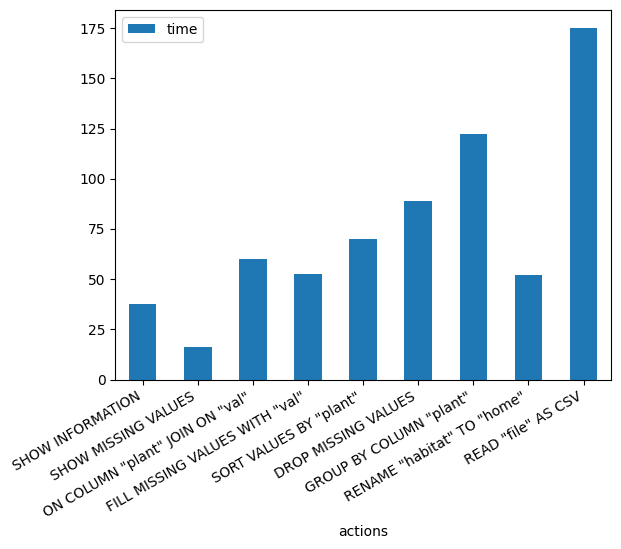

In [12]:
times.plot.bar()
plt.xticks(rotation=30, horizontalalignment="right", fontsize=10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SHOW INFORMATION'),
  Text(1, 0, 'SHOW MISSING VALUES'),
  Text(2, 0, 'ON COLUMN "plant" JOIN ON "val"'),
  Text(3, 0, 'FILL MISSING VALUES WITH "val"'),
  Text(4, 0, 'SORT VALUES BY "plant"'),
  Text(5, 0, 'DROP MISSING VALUES'),
  Text(6, 0, 'GROUP BY COLUMN "plant"'),
  Text(7, 0, 'RENAME "habitat" TO "home"'),
  Text(8, 0, 'READ "file" AS CSV')])

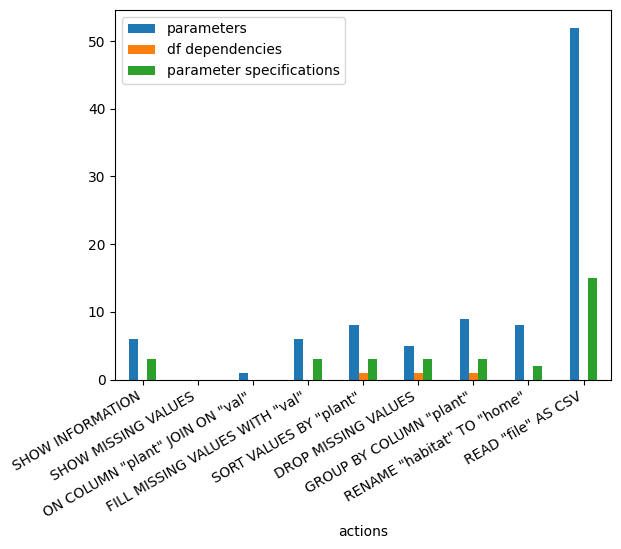

In [13]:
param.plot.bar()
plt.xticks(rotation=30, horizontalalignment="right", fontsize=10)